In [0]:
import warnings
warnings.simplefilter("ignore")

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
X = pd.read_csv("X.csv")
y = X['NUM_GRAVEDAD']
X = X.drop('NUM_GRAVEDAD',axis = 1)

In [13]:
X.columns

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'DIA', 'PERIODO', 'CBML',
       'DIA_SEMANA', 'MES', 'NUM_COMUNA', 'NUM_DISENO', 'NUM_CLASE'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=1)

In [15]:
X_train.head()

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_DISENO,NUM_CLASE
23596,-75.555822,6.238784,725339.0,1668985.0,29.0,2019.0,907.0,1.0,4.0,9.0,1.0,1.0
7410,-75.588506,6.200947,683117.0,1654360.0,20.0,2018.0,1510.0,4.0,12.0,15.0,1.0,1.0
18792,-75.566349,6.269555,664695.0,1630713.0,11.0,2018.0,417.0,1.0,6.0,4.0,1.0,1.0
14174,-75.585019,6.198451,671737.0,1644637.0,3.0,2018.0,1510.0,3.0,10.0,15.0,2.0,1.0
22001,-75.554974,6.290521,714078.0,1667588.0,16.0,2019.0,209.0,2.0,4.0,2.0,2.0,1.0


# Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y, cv=5, scoring='r2')
scores

array([-3.73956449e-04, -2.41881221e-04, -2.00366580e-04, -9.51513775e-04,
       -8.94989886e-05])

In [17]:
scores.mean()

-0.0003714434028563307

In [18]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

-0.001092889704334965

# Seleccion de modelos

In [19]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y,return_train_score=True, cv=5)
results

{'fit_time': array([0.022542  , 0.01660967, 0.01736689, 0.01876283, 0.01418161]),
 'score_time': array([0.00298214, 0.00196314, 0.00182676, 0.00183272, 0.00167871]),
 'test_score': array([-3.73956449e-04, -2.41881221e-04, -2.00366580e-04, -9.51513775e-04,
        -8.94989886e-05]),
 'train_score': array([9.96663223e-05, 1.13550207e-04, 1.24069619e-04, 1.33158657e-04,
        8.31044321e-05])}

In [20]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.00011070984740033652
-0.0003714434028563307


In [25]:
varianza = np.mean(train_scores) / np.mean(test_scores)
print(f'varianza : {varianza }')

varianza : -0.2980530722823407


**Hasta aqui lasso nos dice que no puede mejorar mas, debemos ver otros modelos**

# Validation Curves y Learning Curves

Vecino mas cercano

In [26]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(),X,y,cv=5)

{'fit_time': array([0.05360746, 0.05063701, 0.04841757, 0.0459013 , 0.04836154]),
 'score_time': array([0.08688998, 0.08823514, 0.08732557, 0.11898088, 0.11416292]),
 'test_score': array([ 0.00050973,  0.01287409,  0.00160111, -0.15287162, -0.15693525])}

In [27]:
cross_validate(KNeighborsRegressor(n_neighbors=10),X,y,cv=5)

{'fit_time': array([0.05609369, 0.04697061, 0.0450995 , 0.04578161, 0.0511241 ]),
 'score_time': array([0.10211706, 0.09936786, 0.10402918, 0.13862967, 0.1392467 ]),
 'test_score': array([ 0.03507695,  0.04133701,  0.02890134, -0.05607604, -0.06691998])}

In [28]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [0]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [33]:
np.mean(train_scores, axis=1)

array([0.58938266, 0.35716525, 0.26995386, 0.22130045, 0.19017591,
       0.16604699, 0.14785942, 0.13345745, 0.12256661, 0.11302622,
       0.1056506 , 0.09838532, 0.09233158, 0.0865096 , 0.08206358,
       0.07818467, 0.07466537, 0.07140308, 0.06832508, 0.06542593,
       0.06268827, 0.0607547 , 0.05857026, 0.05651183])

In [39]:
print(f'Score :  {np.mean(train_scores)}')

Score :  0.14051686203221128


([<matplotlib.axis.XTick at 0x7f68fbd75748>,
 [Text(0, 0, '2'),
  Text(0, 0, '4'),
  Text(0, 0, '6'),
  Text(0, 0, '8'),
  Text(0, 0, '10'),
  Text(0, 0, '12'),
  Text(0, 0, '14'),
  Text(0, 0, '16'),
  Text(0, 0, '18'),
  Text(0, 0, '20'),
  Text(0, 0, '22'),
  Text(0, 0, '24'),
  Text(0, 0, '26'),
  Text(0, 0, '28'),
  Text(0, 0, '30'),
  Text(0, 0, '32'),
  Text(0, 0, '34'),
  Text(0, 0, '36'),
  Text(0, 0, '38'),
  Text(0, 0, '40'),
  Text(0, 0, '42'),
  Text(0, 0, '44'),
  Text(0, 0, '46'),
  Text(0, 0, '48')])

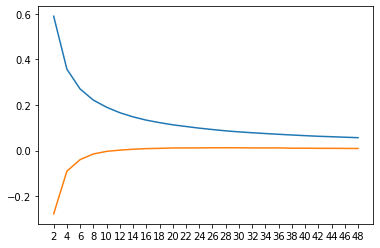

In [34]:
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(test_scores, axis=1))
plt.xticks(np.arange(24),n)

El mejor parametro que se puede elijir es 8 vecinos

# Curva de aprendizaje

In [0]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=8),X,y, cv=5)

samples, train, test = lc[0],lc[1],lc[2] 

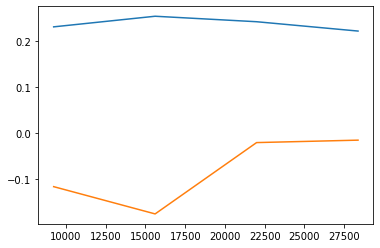

In [47]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])


El modelo KNeighbors esta aprendiendo va creciendo pero a un no a terminado de aprender

para que termine de aprender debemos agregarle mas datos

Aprender: Cuando mejora el score en función de la cantidad de datos